# PCoA (Bray-Curtis) with metabolite ions only

Info: Jupyter notebook originally made by Kyo Bin Kang on May 2020

Description: Filter out a MS feature table to leave spectral node members of a certain molecular family, then calculate Bray-Curtis distances and visualize it as a PCoA plot.

In [1]:
library(stringr)
library(dendextend)
library(ggplot2)
library(vegan)
library(ape)


---------------------
Welcome to dendextend version 1.5.2
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

The following object is masked from 'package:stats':

    cutree

Loading required package: permute

Attaching package: 'permute'

The following object is masked from 'package:dendextend':

    shuffle

Loading required package: lattice
This is vegan 2.4-4

Attaching package: 'ape'

The following objects are masked from 'package:dendextend':

    ladderize, rotate



In [2]:
## Import GNPS data - the interspecific dataset
My.features <- read.table("exclude_error_210217_quant.csv", sep = ",", row.names = 1, header=T, comment.char="")
GNPS.features <- read.csv("fe07cca48e764d9290bd59587d847b3c.tsv", sep = '\t', header=T, stringsAsFactors = F) #Retreived from clusterinfor_summary folder of the GNPS result file
Meta.Inf <- read.table("Sildenafil_metabolism_metadata_batch.txt", sep = "\t", header=T)
My.features <- subset(My.features, select= -c(row.m.z, row.retention.time,X))
colnames(My.features) <- str_replace_all(colnames(My.features), '.Peak.area','')

In [3]:
My.features <- cbind(My.features,GNPS.features$componentindex)
names(My.features)[names(My.features) == "GNPS.features$componentindex"] <- c("component.index")
nrow(My.features)

[1] 415

In [4]:
subset(GNPS.features, LibraryID == 'SildenafilCitrate')[, c('precursor.mass', 'RTMean', 'componentindex', 'LibraryID')]

,precursor.mass,RTMean,componentindex,LibraryID
2,475.2161,17.2880,1,SildenafilCitrate
12,949.4202,17.2577,6,SildenafilCitrate
51,971.4027,17.2848,6,SildenafilCitrate


In [5]:
Selected.features <- subset(My.features, component.index == 1) #Check the spectral node table and figure out the component index of target molecular family
Selected.features <- subset(Selected.features, select= -c(component.index))
nrow(Selected.features)

[1] 46

In [6]:
write.table(Selected.features,"Sildenafil_species_filteredTable.tsv",sep="\t",row.names = T,col.names = NA, quote = F)

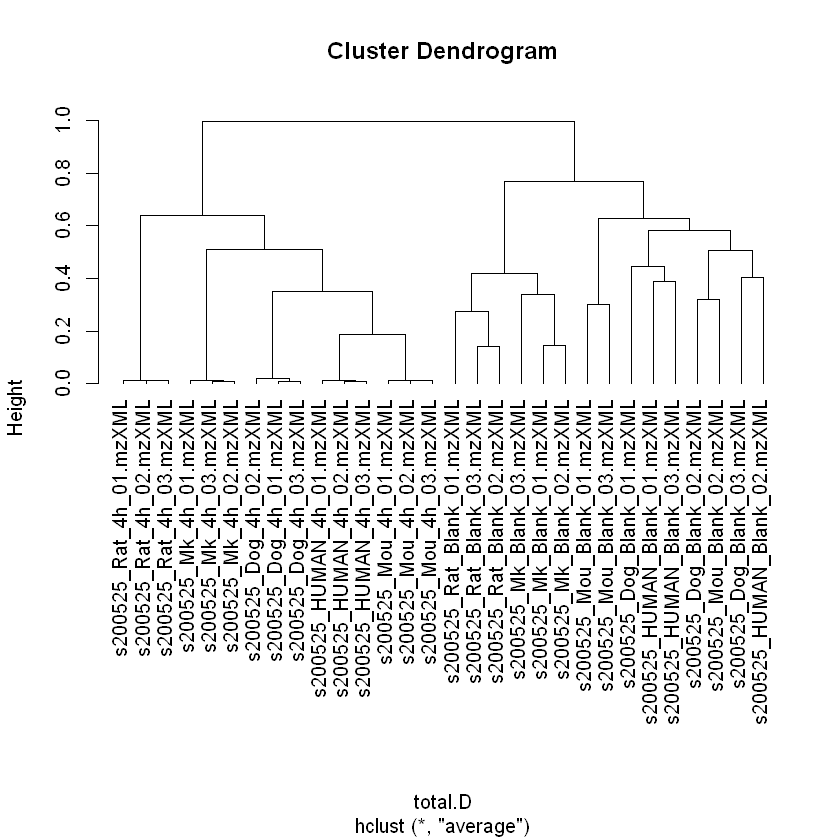

In [7]:
total.D <- vegdist(t(Selected.features), "bray")
total.m <- hclust(total.D, method = 'average')
plot(total.m, hang = -1)
write.table(as.matrix(total.D),"Bray_distance_sildenafil_species.tsv",sep="\t",row.names = T,col.names = NA, quote = F)

In [8]:
## Import GNPS data - the kinetic dataset
My.features <- read.table("210223_timedepen_quant.csv", sep = ",", row.names = 1, header=T, comment.char="")
GNPS.features <- read.csv("8bc94f065a344984bbff96d970f6939c.tsv", sep = '\t', header=T, stringsAsFactors = F) #Retreived from clusterinfor_summary folder of the GNPS result file
Meta.Inf <- read.table("Sildenafil_metabolism_metadata_batch.txt", sep = "\t", header=T)
My.features <- subset(My.features, select= -c(row.m.z, row.retention.time,X))
colnames(My.features) <- str_replace_all(colnames(My.features), '.Peak.area','')

In [9]:
My.features <- cbind(My.features,GNPS.features$componentindex)
names(My.features)[names(My.features) == "GNPS.features$componentindex"] <- c("component.index")
nrow(My.features)

[1] 255

In [10]:
subset(GNPS.features, LibraryID == 'SildenafilCitrate')[, c('precursor.mass', 'RTMean', 'componentindex', 'LibraryID')]

,precursor.mass,RTMean,componentindex,LibraryID
1,475.2125,17.3029,2,SildenafilCitrate
4,949.4178,17.3043,5,SildenafilCitrate
36,971.3989,17.3070,5,SildenafilCitrate


In [11]:
Selected.features <- subset(My.features, component.index == 2)
Selected.features <- subset(Selected.features, select= -c(component.index))
nrow(Selected.features)
write.table(Selected.features,"Sildenafil_kinetic_filteredTable.tsv",sep="\t",row.names = T,col.names = NA, quote = F)

[1] 22

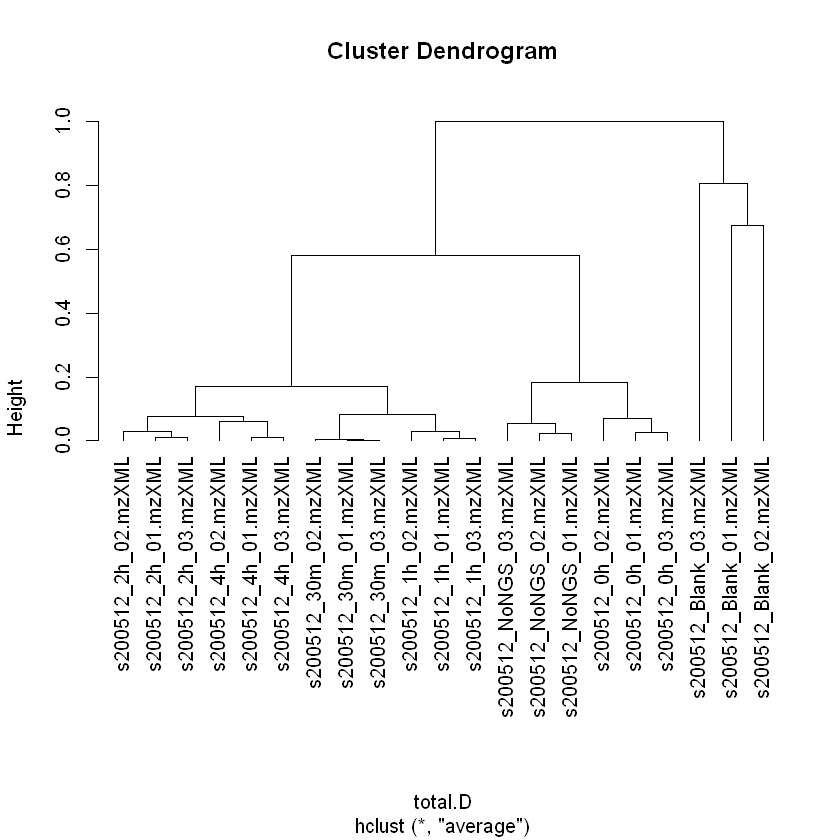

In [12]:
total.D <- vegdist(t(Selected.features), "bray")
total.m <- hclust(total.D, method = 'average')
plot(total.m, hang = -1)
write.table(as.matrix(total.D),"Bray_distance_sildenafil_kinetic.tsv",sep="\t",row.names = T,col.names = NA, quote = F)

In [ ]:
## Scrips below were run in Qiime2 environment for visualizing PCoA plots.

In [ ]:
! qiime tools import --type DistanceMatrix \
    --input-path Bray_distance_sildenafil_species.tsv \
    --output-path Bray_distance_sildenafil_species.qza

In [ ]:
! qiime diversity pcoa \
    --i-distance-matrix Bray_distance_sildenafil_species.qza \
    --o-pcoa Sildenafil_species_PCoA.qza

In [ ]:
! qiime emperor plot \
    --i-pcoa Sildenafil_species_PCoA.qza \
    --m-metadata-file Sildenafil_metabolism_metadata_qiime.txt \
    --o-visualization Sildenafil_species_PCoA.qzv

In [ ]:
! qiime tools import --type DistanceMatrix \
    --input-path Bray_distance_sildenafil_kinetic.tsv \
    --output-path Bray_distance_sildenafil_kinetic.qza

In [ ]:
! qiime diversity pcoa \
    --i-distance-matrix Bray_distance_sildenafil_kinetic.qza \
    --o-pcoa Sildenafil_kinetic_PCoA.qza

In [ ]:
! qiime emperor plot \
    --i-pcoa Sildenafil_kinetic_PCoA.qza \
    --m-metadata-file Sildenafil_metabolism_metadata_qiime.txt \
    --o-visualization Sildenafil_kinetic_PCoA.qzv